## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [56]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [57]:
df = pd.read_csv("ab_data.csv")

b. Use the cell below to find the number of rows in the dataset.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [59]:
df["user_id"].nunique()

290584

d. The proportion of users converted.

In [60]:
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [61]:
len(df.query("converted == 1").groupby(["user_id"])) / len(df["user_id"].unique())

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [62]:
new_page = df.query("landing_page == 'new_page'")
treatment = df.query("group != 'treatment'")


# Trying to use the eval funstion...Needs more work
# pd.eval("df.landing_page.str() == 'new_page' and df.group.str() != 'treatment'", parser='python')

In [63]:
# new_page.info()
# treatment.info()

# Need to account for 'new_page' and no 'treatment' applied
# as well as the reverse 'treatment' is applied, but no 'new_page'
sum((df["landing_page"] == "new_page") & (df["group"] != "treatment")) + sum((df["group"] == "treatment") & (df["landing_page"] != "new_page"))

3893

f. Do any of the rows have missing values?

In [64]:
# No - See df.info() above shows the same number of non-null values to the size
# of the dataframe (row_count)

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [65]:
# Get a boolean T/F series for the 'new_page' w/ 'treatment' rows
df_treat = (df["landing_page"] == "new_page") & (df["group"] == "treatment")
# df_treat.info()

# Get another boolean series for the 'old_page' w/ 'control' rows
df_control = (df["landing_page"] == "old_page") & (df["group"] == "control")
# print(df_control)

# Combine the results to get any True value (True == 1 & False == 0)
df_combined = (df_treat | df_control)
# print(df_combined)

# Select rows from df using the combined boolean series
df2 = df[df_combined]

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [66]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [67]:
len(df2["user_id"].unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [68]:
df2[df2["user_id"].duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [69]:
# See above for user_id == 773192

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [70]:
df2 = df2[(df2.duplicated(subset="user_id")) == False]

In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [72]:
# df2["converted"].astype(bool, inplace=True)

# Take the total of converted & devide by total number or records
df2["converted"].sum() / len(df2)

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [73]:
# len(df2[(df2["group"] == "control")])

# sum((df2["group"] == "control") & (df2["converted"] == 1))

# Take sum of 'converted' rows equal to 1 (True) in the 'control' group 
# and divide by the total number of records in the 'control' group
sum((df2["group"] == "control") & (df2["converted"] == 1)) / len(df2[(df2["group"] == "control")])

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [74]:
# Same as above but for the 'treatment' group
sum((df2["group"] == "treatment") & (df2["converted"] == 1)) / len(df2[(df2["group"] == "treatment")])

0.11880806551510564

d. What is the probability that an individual received the new page?

In [75]:
# Take the sum (True == 1) of records where 'landing_page'
# was the 'new_page' and divide by total number of records
sum(df2["landing_page"] == "new_page") / len(df2)

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

Based on the evidence of the probabililty of conversion there does not appear to be any link between being in the `treatment` group & having a higher conversion rate.

The probability of conversion in the entire dataset is at **11.96%** while in the `treatment` group it is slightly lower at **11.89%**. While the `control` group is actually slightly higer than eiter one at **12.04%** making the effect of the new page neglible to none.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$ H_0 : p_{new} - p_{old} \leq 0 $$
$$ H_1 : p_{new} - p_{old} > 0 $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [76]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [77]:
p_new_data = df2.query('group == "treatment"').converted.mean()
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [78]:
p_old_data = df2.query('group == "control"').converted.mean()
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [79]:
n_new = df2.query("landing_page == 'new_page'").user_id.nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [80]:
n_old = df2.query("landing_page == 'old_page'").user_id.nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [81]:
# new_page_converted = []

data_size = df2.shape[0]

# This won't quire work for what is asked int he question
# for _ in range(10000):
#     boot_sample = df2.sample(n_new, replace=True)    
#     new_page = boot_sample.query('landing_page == "new_page"').converted.mean()

# Using the numpy random choice method to generate the sample
# This has the benefit of being able to provide the conversion rate 
# as the probability for the possible choices: [0,1]
n_test = np.random.choice([0,1], size=n_new, replace=True, p=[1-p_new,p_new])
n_test.mean()

0.11857408299497625

In [82]:
new_page_converted = np.random.choice([0,1], size=data_size, replace=True, p=[1-p_new, p_new])
new_page_converted.mean()

0.12050560251080583

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [83]:
old_page_converted = np.random.choice([0,1], size=data_size, replace=True, p=[1-p_old, p_old])
old_page_converted.mean()

0.12020620543457314

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [84]:
(new_page_converted - old_page_converted).mean()

0.00029939707623269005

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [85]:
p_diffs = []

# Needed to do this 10K times as the distribution did not look anything close to normal
for _ in range(10000):
    p_new_10k = np.random.choice([0,1], size=10000, replace=True, p=[1-p_new, p_new])
    p_old_10k = np.random.choice([0,1], size=10000, replace=True, p=[1-p_old, p_old])
    p_diffs.append(p_new_10k.mean() - p_old_10k.mean())

p_diffs = np.array(p_diffs)
p_diffs.size

10000

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

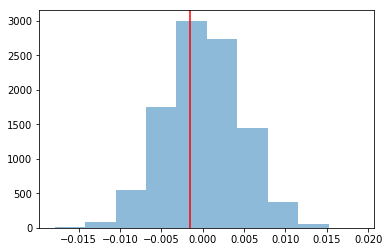

In [86]:
plt.hist(p_diffs, alpha=0.5);
plt.axvline(p_new_data-p_old_data, c='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [87]:
p_diffs.mean(), p_diffs.std()

(3.9280000000000037e-05, 0.0045698688254259554)

In [88]:
p_value = (p_diffs > (p_new_data - p_old_data)).mean()
print("p_value is:", p_value)

p_value is: 0.6346


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In part **j.** I computed the $p-value$ for the sampling distribution. This is the probability of obtaining the value seen in the observed data or a more extreme value given the null hypothesis. Given that the value of **~63.46%** is well above an $\alpha$ level of **0.05** it would suggest that there is no statistical significance between the `new_page` and `old_page` as it relates to conversion and we would fail to reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [89]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"')['converted'].sum()
convert_new = df2.query('landing_page == "new_page"')['converted'].sum()
n_old = len(df2.query('landing_page == "old_page"'))
n_new = len(df2.query('landing_page == "new_page"'))



print("Number of conversion on the 'old page' is:", convert_old)
print("Number of conversion on the 'new page' is:", convert_new)

Number of conversion on the 'old page' is: 17489
Number of conversion on the 'new page' is: 17264


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [90]:
z_test, p_val_b = sm.stats.proportions_ztest(count=[convert_new, convert_old], nobs=[n_new, n_old], alternative="larger")

print("The z_value value from the built-in method is:",z_test)
print("The p_value from the built-in method is:", p_val_b)

The z_value value from the built-in method is: -1.31092419842
The p_value from the built-in method is: 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Using the built-in method we got a z-score of `-1.3109` and a p-value of `0.9051`. The critical value for an upper-tailed z-test with  an $\alpha$ level of **0.05** is `1.645`, which means that in order to reject the null hypothesis the z-score needs to be $\geq$ to that.

Given that the z-score is negative and this is a one tailed (upper) test we would fail to reject the null hypothesis. This is consistent with the results that we got before. The p-value is also higher using the built-in method, but they're both pointing to the same conclusion that we fail to reject the null hypothesis. Which means that there is no evidence that the new page is better at converting customers as compared to the old page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Because the choice is categorical the best approach is to use a logistic regression here.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [91]:
df2.tail()

,user_id,timestamp,group,landing_page,converted
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0


In [92]:
df2['intercept'] = 1

df2[['ab_page2', 'ab_page']] = pd.get_dummies(df2['group'])
df2.drop(columns='ab_page2', inplace=True)

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [93]:
logit_m = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_m.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [94]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 30 Jun 2019   Pseudo R-squ.:               8.077e-06
Time:                        21:54:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [95]:
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [96]:
1/np.exp(results.params)

intercept    7.306593
ab_page      1.015102
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value here is `0.190`. And if we look at the coefficient it is saying that it's `0.985` times more likely that someone will convert based on being in the treatment group holding all other factors constant. Which is consistant with what we saw from the population parameters, where the control group has a slilghtly higher chance of conversion.

With logistic regression we're trying to predict whether someone will convert based on the page that they were on. 

The null hypothesis is that there is no relation between our dependent variable (conversion) and independant variable (page). And the alternative hypothesis would be that there is a relationship between the two.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

If we add additional factors to our model we might get a better fitting model for the given data. Doing so though can make interperting the results more difficult as well as create issues of collinearity if the factors are higly related to one another.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [97]:
# Read in the countries.csv file & load into a dataframe
countries = pd.read_csv('countries.csv')

countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [98]:
# What are the unique countries in the new dataset & are there any duplicated user_id's values?
countries.country.unique(), countries.user_id.duplicated().sum()

(array(['UK', 'US', 'CA'], dtype=object), 0)

In [99]:
# Join the two dataframes together using a left-join (preserce df2 if no user_id in countries) on the user_id column
df2 = df2.join(countries.set_index('user_id'), on='user_id')

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [100]:
df2[['CA', 'UK', 'US']] = pd.get_dummies(df2['country'])

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [101]:
df2['intercept'] = 1

log_m = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'UK', 'CA']])
results2 = log_m.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 30 Jun 2019   Pseudo R-squ.:               2.323e-05
Time:                        21:54:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
==============================================================================
"""

In [102]:
np.exp(results2.params)

intercept    0.136795
ab_page      0.985168
UK           1.009932
CA           0.960062
dtype: float64

In [103]:
1/np.exp(results2.params)

intercept    7.310207
ab_page      1.015056
UK           0.990165
CA           1.041599
dtype: float64

Since we're doing logistic regression we need to expontiate our coefficients to interpret the results. We used `US` as the baseline country for this model. According the these results a user from the `UK` is `1.001` times *more likely* to have been converted than a user from the `US` holding all other factors constant.

And since `CA` had a negative coefficient we took the inverse of it as well, which yields that a user from `CA` is `1.042` times *less likely* to convert than a user from the `US` holding all other factors constant.

Based on these results there doesn't seem to be much of a difference between which country a user is in & the likelyhood of conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [105]:
# Using a lambda to a determine group & country.
# Modified from https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns
# Addition would yield values other than 0 & 1

df2['CA_t'] = df2.apply(lambda row: row.ab_page * row.CA, axis=1)
df2['UK_t'] = df2.apply(lambda row: row.ab_page * row.UK, axis=1)
df2['US_t'] = df2.apply(lambda row: row.ab_page * row.US, axis=1) #df2[(df2.group == 'control') & (df2.country == 'US')]

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,CA_t,UK_t,US_t
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0,0


In [108]:
# Instantiate & fit the new model using the new columns based on group & country
# to see if there was an effect from receiving the old or new page in each country
# with the US as the baseline

log_m2 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'UK', 'UK_t', 'CA', 'CA_t']])
results3 = log_m2.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 30 Jun 2019   Pseudo R-squ.:               3.482e-05
Time:                        22:00:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
UK_t           0.0314      0.027      1.181      0.238      -0.021       0.084
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
CA_t          -0.0469      0.054     -0.872      0.383      -0.152       0.059
==============================================================================
"""

In [109]:
np.exp(results3.params)

intercept    0.137178
ab_page      0.979646
UK           0.994272
UK_t         1.031896
CA           0.982625
CA_t         0.954198
dtype: float64

In [110]:
1/np.exp(results3.params)

intercept    7.289813
ab_page      1.020776
UK           1.005761
UK_t         0.969090
CA           1.017682
CA_t         1.048001
dtype: float64

### Conclusion:

Results from the new model using the country/treatment columns do not produce a different result from our previous work. Most of the coefficients are negative with this new model indicating that the results for seeing the `new_page` and being in `CA` are *less likely* to convert against the baseline, but only by `1.048` holding all other factors constant. The results for being in the `UK` and seeing the `new_page` are `1.031` *more likely* convert against the baseline hodling all factors constant.

Since the change in conversion based on the population results, sample statistics, and logistic regression modeling is either negative or very small we would fail to reject the null hypothesis for this dataset. It would suggest that the e-commerce website should continue to use the `old_page` as there is no statistically significant reason to stop using it. 

However, neither is there evidence that the `new_page` creates significantly worse results either. Both pages produce about the same rate of conversion.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])